In [1]:
# Load libraries
import seaborn
import pandas
from sklearn import tree
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score


In [2]:
dataset = pandas.read_csv("unplugged.csv")
dataset.sample(frac=1)
dataset = dataset[0:360]
del dataset['Comments']


In [3]:
print(dataset.head(300))

     School Name           Student Name  Age Gender Results_Before  \
0      IMSJ G9-2                 Anthny   12      M              F   
1      IMSJ G9-2            Farhana Ali   10      F              F   
2      IMSJ G9-2              Samiullah   10      M              F   
3      IMSJ G9-2                  Uzair   12      M              F   
4      IMSJ G9-2                  Sarim    8      M              P   
5      IMSJ G9-2              M. Sohaib   12      M              F   
6      IMSJ G9-2                  Laiba    8      F              F   
7      IMSJ G9-2              Isha Khan    9      F              F   
8      IMSJ G9-2            Ayesha Ayaz    9      F              F   
9      IMSJ G9-2           Rubab Khalid   10      F              F   
10     IMSJ G9-2            Umme Habiba   10      F              F   
11     IMSJ G9-2            Hifza Qasar   10      F              F   
12     IMSJ G9-2            Fariha Noor    9      F              P   
13           NaN    

In [4]:
print(dataset.shape)

(360, 8)


In [5]:
# dataset = dataset.drop('Id',axis=1)

In [6]:



gender = {'M': 1, 'F': 2}
dataset.Gender = [gender[item] for item in dataset.Gender]

before = {'F': 0, 'P': 1}
dataset.Results_Before   = [before[item] for item in dataset.Results_Before]


print(dataset.describe())

dataset =  dataset[['Age', 'Gender', 'Class', 'Results_Before', 'Results_After']]

              Age      Gender  Results_Before       Class
count  360.000000  360.000000      360.000000  360.000000
mean     9.616667    1.630556        0.391667    4.052778
std      1.287502    0.483326        0.488802    0.619995
min      7.000000    1.000000        0.000000    3.000000
25%      9.000000    1.000000        0.000000    4.000000
50%     10.000000    2.000000        0.000000    4.000000
75%     10.000000    2.000000        1.000000    4.000000
max     14.000000    2.000000        1.000000    5.000000


In [7]:
# print(dataset.head(300))

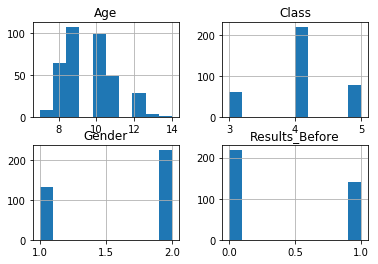

In [8]:
dataset.hist()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:4]
Y = array[:,4:]
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, 
random_state=seed, stratify = dataset['Class'])

In [10]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models = []

models.append(('DT', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []

In [11]:
import sklearn
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=10,shuffle=True, random_state=5)
	cv_results = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

DT: 0.715025 (0.064321)


In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
print(str(accuracy_score(Y_test, predictions)*100)+'%')

76.38888888888889%


In [13]:
print(confusion_matrix(Y_test, predictions))

[[ 7 10]
 [ 7 48]]


In [14]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           F       0.50      0.41      0.45        17
           P       0.83      0.87      0.85        55

   micro avg       0.76      0.76      0.76        72
   macro avg       0.66      0.64      0.65        72
weighted avg       0.75      0.76      0.76        72



In [15]:
# #Precision
# precision = precision_score((Y_test), predictions, average=None)
# print("Precision", str(precision))

# #recall
# recall = recall_score((Y_test), predictions, average=None)
# print("Recall : ", str(recall))

# #f-score
# f_score = f1_score((Y_test), predictions, average=None)
# print("F Score : " + str(f_score))


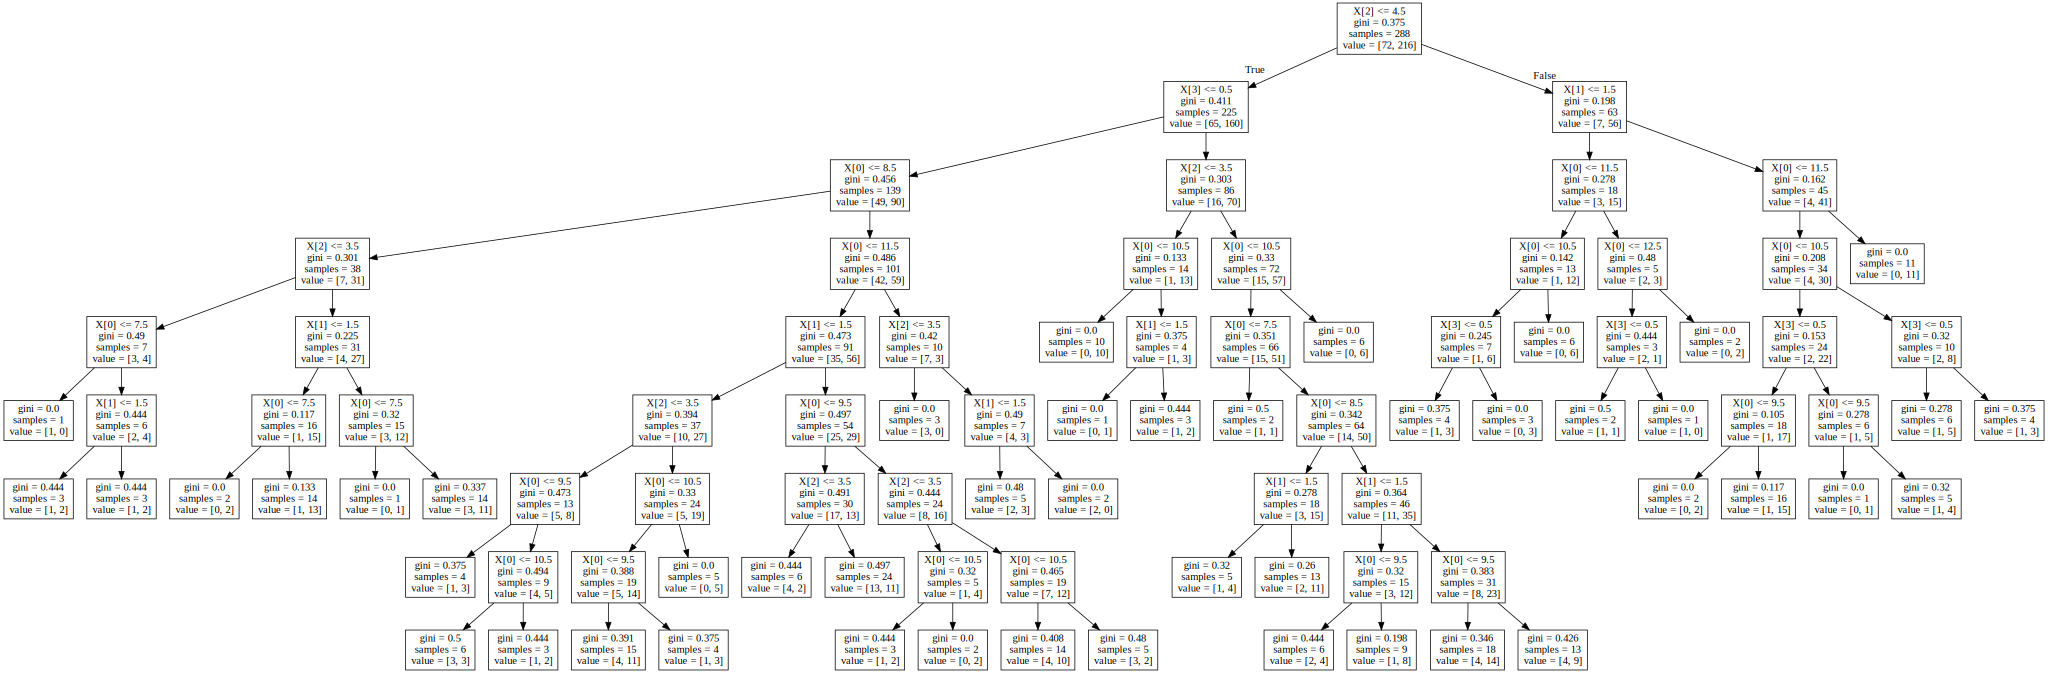

In [16]:

dot_data = tree.export_graphviz(clf, out_file=None,
#                      feature_names=vectorizer.get_feature_names(),
                     class_names=["0", "1"],
                     filled=True, rounded=True,
                     special_characters=True)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("lol_1111")
graph